In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from scipy import stats
from dependencies import perform_kmeans_clustering, get_annual_return, perform_polynomial_clustering

In [2]:
data_frame = pd.read_csv('datasets/S&P500_EOD-Price.csv')
data_frame = data_frame.dropna(axis=1)

data_frame.head()

,Date,APA,MTCH,GEN,DXC,EG,BKR,AMD,HON,BALL,...,SNPS,SWKS,ZION,TTWO,VRTX,TRMB,ZBRA,LNT,BBWI,WBA
0,2000-01-03,14.772727,7.527071,7.109375,46.327873,21.8750,20.2500,15.500,54.044136,2.488281,...,32.781250,31.406250,55.5000,9.125000,18.78125,4.145833,25.027779,13.40625,16.395514,28.5625
1,2000-01-04,14.123377,6.921444,6.781250,46.017365,21.8125,20.2500,14.625,53.090767,2.406250,...,30.437500,29.562500,52.8125,8.875000,17.28125,4.072917,24.666668,13.40625,16.067099,27.5000
2,2000-01-05,14.529221,6.661890,6.375000,42.788074,23.2500,20.3750,15.000,52.375736,2.449219,...,30.703125,30.328125,52.7500,8.833333,17.00000,3.817708,25.138889,14.06250,15.839733,27.8125
3,2000-01-06,15.909091,6.938748,6.007813,43.409092,24.3125,22.3125,16.000,53.388695,2.488281,...,28.468750,27.375000,53.5000,8.750000,16.75000,3.854167,23.777779,14.06250,15.587106,27.0000
4,2000-01-07,15.854978,6.904141,6.484375,43.315941,25.6250,23.8125,16.250,56.248802,2.417969,...,28.750000,30.187500,53.6250,9.000000,18.21875,3.854167,23.513889,14.25000,15.688157,27.6875


In [3]:
data_frame["Date"] = pd.to_datetime(data_frame["Date"])
data_frame['Year'] = data_frame["Date"].dt.year

processing_years = [year for year in range(2000, 2025)]
data_frame_annual_returns = []

for year in processing_years:
    filtered_data = data_frame[data_frame['Year'] == year]
    for column in filtered_data.columns:
        if column not in ["Date", "Year"]:
            annual_return = get_annual_return(filtered_data[column].iloc[0], filtered_data[column].iloc[-1])
            annual_returns = [get_annual_return(filtered_data[column].iloc[0], filtered_data[column].iloc[i]) for i in range(len(filtered_data))]  
           
            relative_percentile = stats.percentileofscore(annual_returns, annual_return)
            data_frame_annual_returns.append({'Stock': column, 'Year': year, 'Annual_Return': annual_return, 'Relative_Percentile': relative_percentile})


data_frame_annual_percentile = pd.DataFrame(data_frame_annual_returns)

In [4]:
data_frame_annual_percentile.head()

,Stock,Year,Annual_Return,Relative_Percentile
0,APA,2000,105.311369,99.206349
1,MTCH,2000,-28.505749,22.420635
2,GEN,2000,-41.318681,2.777778
3,DXC,2000,-35.522790,0.396825
4,EG,2000,227.428571,98.412698


E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Cluster'] = kmeans.labels_


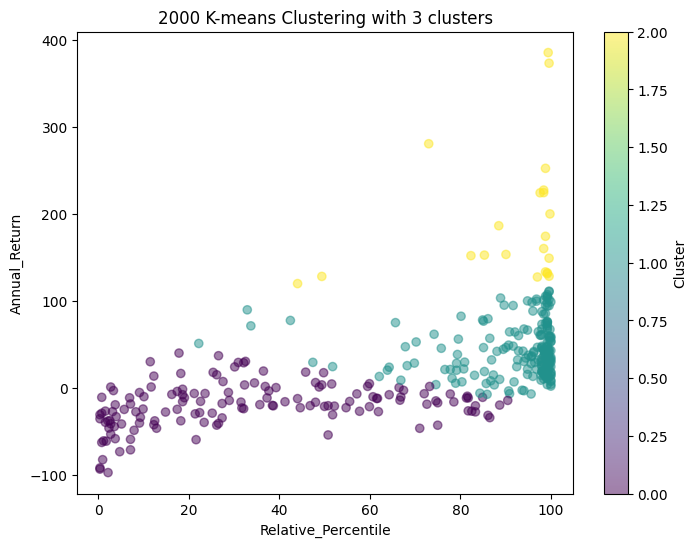

In [ ]:
import numpy as np

cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=0, vmax=2)

for year in processing_years:
    filtered_data_frame_by_year = data_frame_annual_percentile[data_frame_annual_percentile['Year'] == year]

    perform_kmeans_clustering(filtered_data_frame_by_year, ['Relative_Percentile', 'Annual_Return'], cmap, str(year) + ' K-means Clustering with 3 clusters', save_as_image=True)
    perform_polynomial_clustering(filtered_data_frame_by_year, ['Relative_Percentile', 'Annual_Return'], str(year) + ' Polynomial Regression', save_as_image=True)

In [ ]:
data_frame_annual_percentile_filtered_data_2024 = data_frame_annual_percentile[data_frame_annual_percentile['Year'] == 2024]
data_frame_annual_percentile_filtered_data_2024.head()

In [ ]:
mcap_data_frame = pd.read_excel('datasets/MCAP_2024.xlsx')
mcap_data_frame['Mcap'] = mcap_data_frame['Mcap'].str.replace(',', '').astype(float)
mcap_list = list(mcap_data_frame.iloc[:, 0].sort_values())

In [ ]:
data_frame_annual_percentile_filtered_data_2024_list = list(data_frame_annual_percentile_filtered_data_2024.iloc[:, 0].sort_values())

In [ ]:
combined_stock_info = []

for filtered_stock in data_frame_annual_percentile_filtered_data_2024_list:
    for mcap_stock in mcap_list:
        if filtered_stock == mcap_stock:
            combined_stock_info.append(filtered_stock)

In [ ]:
mcap_data_frame.head()

In [ ]:
data_frame_annual_percentile_filtered_data_2024.sort_values(by='Stock').head()

In [ ]:
for id_value in combined_stock_info:
    if id_value in mcap_data_frame['Ticker'].values and id_value in data_frame_annual_percentile_filtered_data_2024['Stock'].values:
        if mcap_data_frame.loc[mcap_data_frame['Ticker'] == id_value, 'Mcap'].values[0]:
            specific_column_value = mcap_data_frame.loc[mcap_data_frame['Ticker'] == id_value, 'Mcap'].values[0]
            data_frame_annual_percentile_filtered_data_2024.loc[data_frame_annual_percentile_filtered_data_2024['Stock'] == id_value, 'Mcap'] = specific_column_value

data_frame_annual_percentile_filtered_data_2024.head()

In [ ]:
data_frame_annual_percentile_filtered_data_2024.sort_values(by='Stock').head()

In [ ]:
data_frame_annual_percentile_filtered_data_2024 = data_frame_annual_percentile_filtered_data_2024.dropna()

In [ ]:
perform_kmeans_clustering(data_frame_annual_percentile_filtered_data_2024, ['Mcap', 'Annual_Return'], save_as_image=True)

In [ ]:
perform_kmeans_clustering(data_frame_annual_percentile_filtered_data_2024, ['Mcap', 'Relative_Percentile'], save_as_image=True)